In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
import glob

In [33]:
files = glob.glob("../results/*")

In [34]:
files

['../results/backtest_short_spread_rvrp.pkl',
 '../results/backtest_short_spread_standard.pkl']

In [10]:
spy = yf.download("SPY", "2023-01-01")
spy.index = spy.index.date
spy['ret'] = spy['Adj Close'].pct_change()

[*********************100%%**********************]  1 of 1 completed


In [36]:
df = pd.read_pickle('../results/backtest_short_spread_standard.pkl')
df.index = df.index.date
df2 = pd.read_pickle('../results/backtest_short_spread_rvrp.pkl')
df2.index = df2.index.date

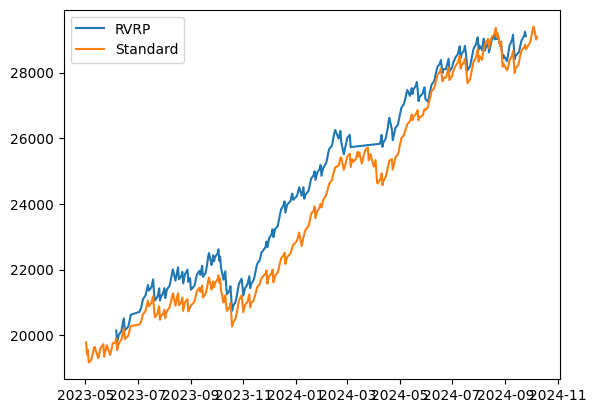

In [37]:
df2['net_capital'].plot(label = "RVRP")
df['net_capital'].plot(label = "Standard")
plt.legend()

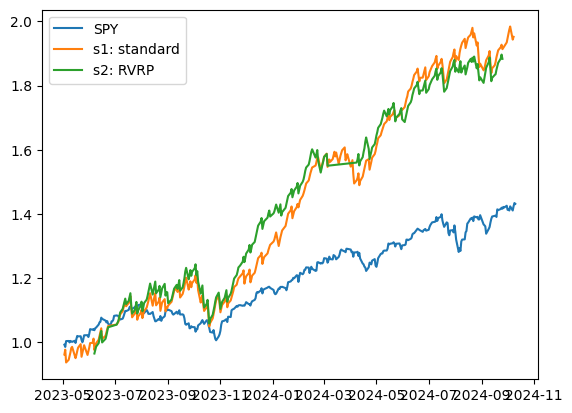

In [48]:
adj = -10000
(spy.loc[spy.index > df.index.min()]['ret'] + 1).cumprod().plot(label = "SPY")
((df['net_capital']+ adj).pct_change() + 1).cumprod().plot(label = "s1: standard")
((df2['net_capital']+ adj).pct_change() + 1).cumprod().plot(label = "s2: RVRP")
plt.legend()

In [43]:
adj = -10000 # starting capital adjustment - default starts at 20000
pd.concat([spy.loc[spy.index > df.index.min()]['ret'], (df['net_capital']+ adj).pct_change(),(df2['net_capital']+ adj).pct_change()], axis = 1).dropna().corr()

,ret,net_capital,net_capital
ret,1.000000,0.116782,0.104862
net_capital,0.116782,1.000000,0.918793
net_capital,0.104862,0.918793,1.000000
